# CartPole

https://gym.openai.com/envs/CartPole-v1/

CartPole defines "solving" as getting average reward of 475.0 over 100 consecutive trials. 

In [6]:
import logging
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import wrappers

logging.getLogger('gym').setLevel(logging.WARNING)

def moving_average(xs, n=100):
    ret = np.cumsum(xs, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def find_index(xs, v):
    """Find index of the first value equal or greater then v"""
    for i in range(len(xs)):
        if xs[i] >= v:
            return i
    return -1

## Load environment

In [8]:
SOLVED_SCORE = 475
env = gym.make('CartPole-v0')

# Random agent

This agent can't solve this problem but can be used as a benchmark for other agents

In [4]:
class RandomAgent(object):
    def __init__(self, num_actions):
        self.num_actions = num_actions

    def choose_action(self, state, step):
        return np.random.choice(range(self.num_actions))
    
    def learn(self, state, action, reward, next_state):
        pass

## Evaluate agent

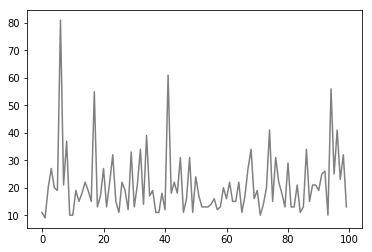

In [12]:
# Learning parameters
learning_rate = 0.8
num_episodes = 100

# Agent
agent = RandomAgent(env.action_space.n)

# Learn Q-Table
rewards = []
for episode in range(num_episodes):
    s = env.reset()
    total_reward = 0
    for j in range(100):
        a = agent.choose_action(s, episode)
        s2, reward, done, _ = env.step(a)
        agent.learn(s, a, reward, s2)
        s = s2
        total_reward += reward
        if done:
            break
    rewards.append(total_reward)
    
# Show summary
averaged_rewards = moving_average(rewards)    
idx = find_index(averaged_rewards, SOLVED_SCORE)
if idx >= 0:
    print('Solved after {} episodes'.format(idx+1))

plt.plot(averaged_rewards, color='blue')
plt.plot(rewards, color='gray')
plt.show()